In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow.keras.datasets import mnist

In [2]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


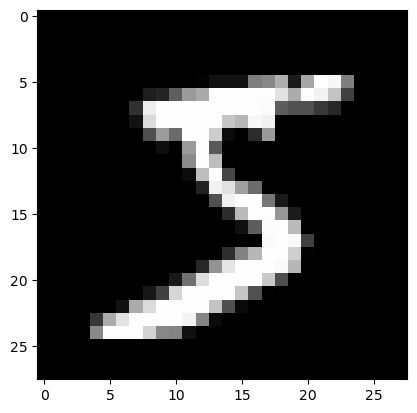

In [5]:
plt.imshow(x_train[0],cmap='gray')

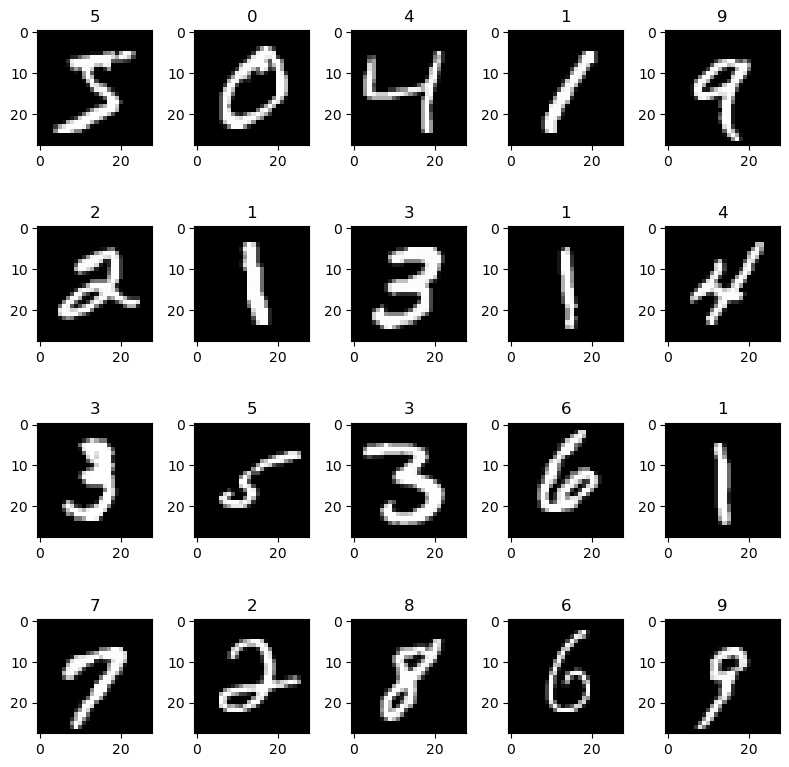

In [6]:
plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(y_train[i])
plt.tight_layout()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [14]:
model=Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='sigmoid')])

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(x_train,y_train,epochs=8,validation_split=0.05)

Epoch 1/8
1782/1782 [==============================] - 10s 5ms/step - loss: 0.2487 - accuracy: 0.9270 - val_loss: 0.1072 - val_accuracy: 0.9697
Epoch 2/8
1782/1782 [==============================] - 8s 4ms/step - loss: 0.1063 - accuracy: 0.9672 - val_loss: 0.0840 - val_accuracy: 0.9743
Epoch 3/8
1782/1782 [==============================] - 8s 4ms/step - loss: 0.0733 - accuracy: 0.9770 - val_loss: 0.0807 - val_accuracy: 0.9780
Epoch 4/8
1782/1782 [==============================] - 8s 4ms/step - loss: 0.0554 - accuracy: 0.9821 - val_loss: 0.0772 - val_accuracy: 0.9777
Epoch 5/8
1782/1782 [==============================] - 10s 5ms/step - loss: 0.0439 - accuracy: 0.9855 - val_loss: 0.0739 - val_accuracy: 0.9817
Epoch 6/8
1782/1782 [==============================] - 9s 5ms/step - loss: 0.0343 - accuracy: 0.9885 - val_loss: 0.0993 - val_accuracy: 0.9750
Epoch 7/8
1782/1782 [==============================] - 9s 5ms/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0984 - val_accuracy: 0.97

In [18]:
predicted=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
predicted=[np.argmax(i) for i in predicted]

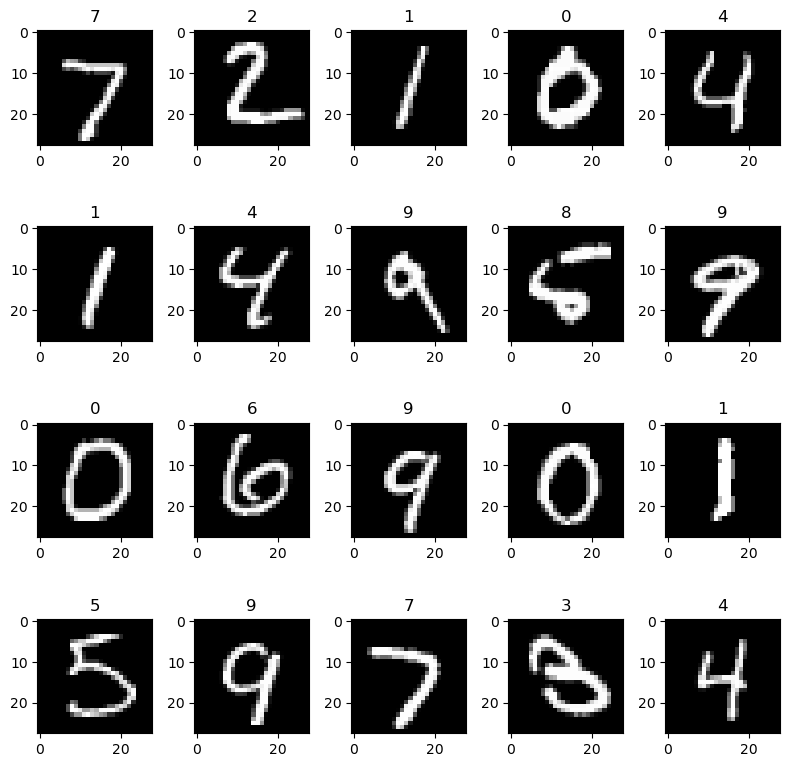

In [21]:
plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_test[i],cmap='gray')
    plt.title(predicted[i])
plt.tight_layout()

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
accuracy_score(y_test,predicted)

0.9762

<AxesSubplot:>

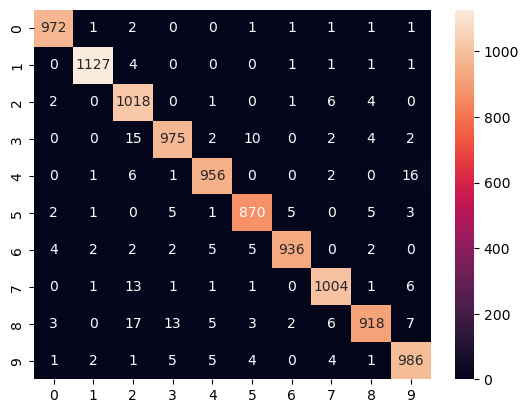

In [24]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt='d')

In [25]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.99      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.98      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

